# Understanding the coherence in the V model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from _utils import *
from FCS import *

In [24]:
# Define system parameters
N = 3 # Number of levels
nu = 1 # Frequency of the system
a = 0.001 
delta = 0.001
alpha = 0.5
beta = 1/4

# Define the parameters for the V-model
params = {'nu': nu, 'a': a, 'delta': delta, 'beta': beta}

# Define the V-model
g_ops, H_uni, c_ops_uni = V_model_1bath(**params, kind='unified')
rho_ss_uni = steadystate(H_uni, c_ops_uni)

In [29]:
t0, tf = 0, 10e5
dt = 0.1
tlist = np.arange(t0, tf, dt)

# Solve master equation with the initial state set to the ground state
e_ops = [g_ops[1]*g_ops[1].dag(), g_ops[2]*g_ops[2].dag(), g_ops[1]*g_ops[2].dag()]
result_uni = mesolve(H_uni, g_ops[0], tlist, c_ops_uni, e_ops)


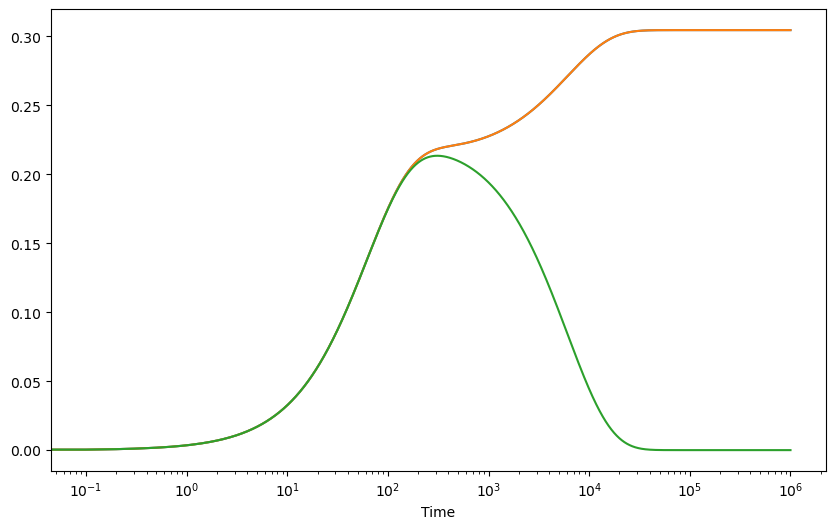

In [30]:
# Plot results for the V-model
sigma22 = result_uni.expect[0]
sigma33 = result_uni.expect[1]
sigma23 = result_uni.expect[2]

fig =  plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(tlist, sigma22, label=r'$\sigma_{22}$')
ax.plot(tlist, sigma33, label=r'$\sigma_{33}$')
ax.plot(tlist, sigma23, label=r'$\sigma_{23}$')
ax.set_xlabel('Time')

plt.xscale('log')

plt.show()
